### Task 4:

# Introduction: Predicting Insurance Claim Amounts

## Problem Statement: To estimate individual medical insurance charges based on features such as age, BMI, and smoking status using a Linear Regression model.

### Objective 1: Load and Explore the Dataset

In [1]:
# Import Library
import pandas as pd

In [2]:
# Load Dataset
df=pd.read_csv("C:/Users/luqma/Downloads/archive/insurance.csv")

In [3]:
#Dataset Structure
print("Shape:", df.shape)

Shape: (1338, 7)


In [4]:
#Column Names
print("Columns:", df.columns.tolist())

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Objective 2: Data Cleaning and Preparation

In [8]:
#Check Missing Values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
if df.isnull().sum().sum() == 0:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values found. Consider filling or dropping them.")

✅ No missing values found in the dataset.


### Objective 3: Encode Categorical Variables

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Before encoding categorical columns
print("Before Encoding:")
display(df[['sex', 'smoker', 'region']].head())

Before Encoding:


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [12]:
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

In [13]:
# Manual encoding for binary categorical columns
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})

In [14]:
# After Encoding Categorical Variables
print("After Encoding:")
display(df_encoded.head())

After Encoding:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


### Objective 4: Visualizations: BMI, Age, and Smoking vs Charges

In [15]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Set style for plots
sns.set(style='whitegrid')

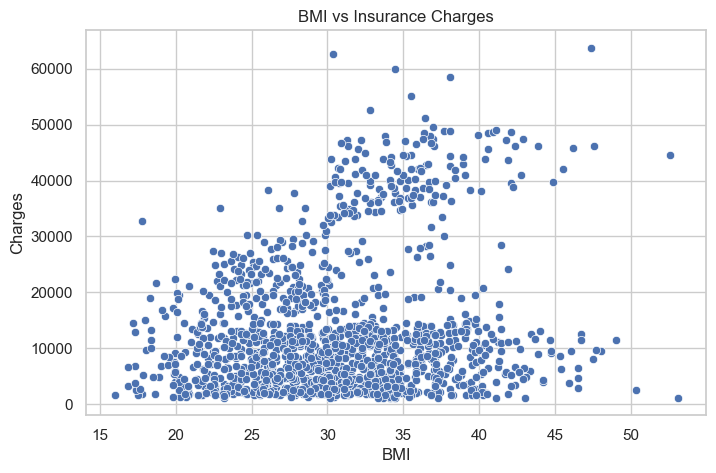

In [17]:
# Visualize relationship between BMI and charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

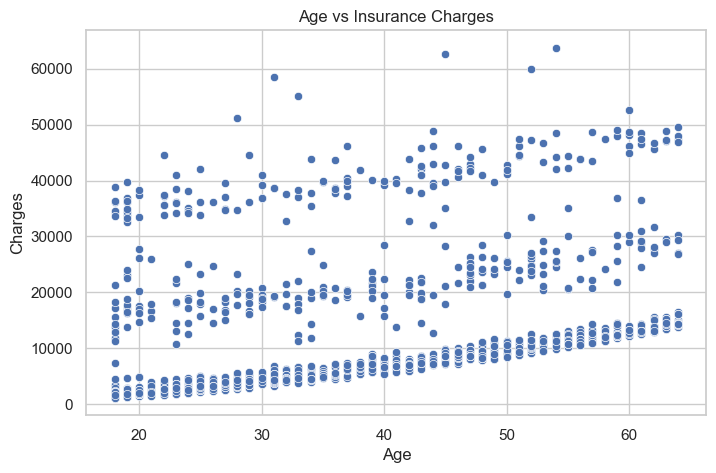

In [18]:
# Visualize relationship between Age and charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

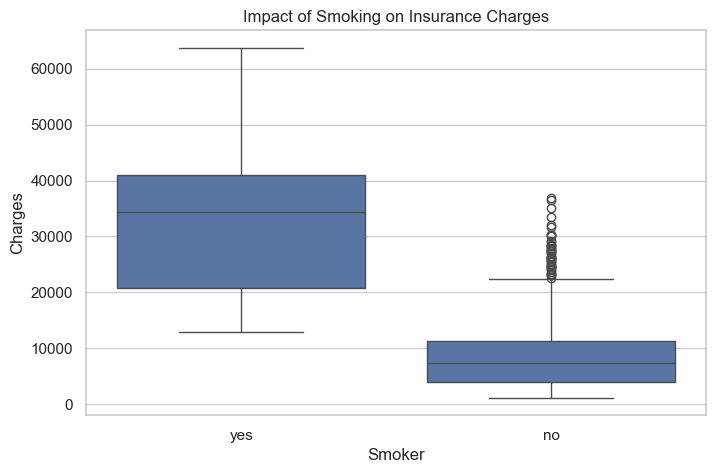

In [19]:
# Visualize impact of smoking status on charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Impact of Smoking on Insurance Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

### Objective 5: Train a Linear Regression Model

In [20]:
# Import Scikit-Learn Tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
# Define features
X = df_encoded.drop('charges', axis=1)
print("Feature columns:")
print(X.columns.tolist())

Feature columns:
['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']


In [23]:
# Define Target
y = df_encoded['charges']
print("\nTarget variable (charges) preview:")
print(y.head())


Target variable (charges) preview:
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)

Train feature shape: (1070, 8)
Test feature shape: (268, 8)


In [25]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


### Objective 6: Make Predictions

In [26]:
# Make predictions
y_pred = lr_model.predict(X_test)

print("Predictions (first 5):")
print(y_pred[:5])

Predictions (first 5):
[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]


### Objective 7: Evaluate Model Performance

In [30]:
# Import Tool and Library
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [31]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28
R² Score: 0.78


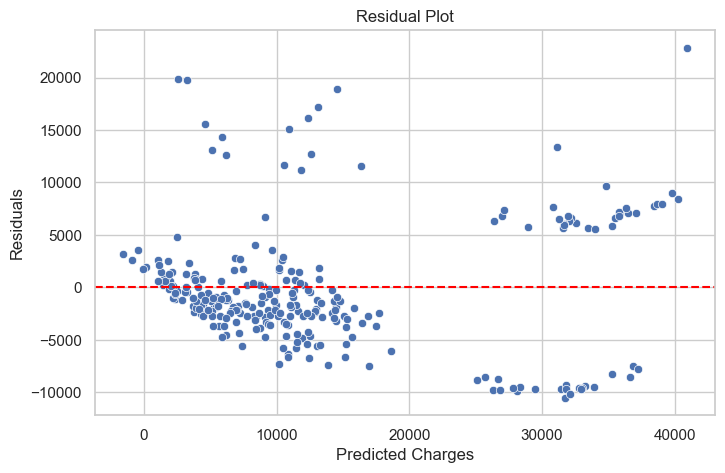

In [29]:
# Visualize Prediction Accuracy
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## Conclusion

- The Linear Regression model performed well on the Medical Cost Personal Dataset, achieving an **R² score of 0.78**, meaning it explained **78% of the variance** in insurance charges.
- Features like **smoking status**, **BMI**, and **age** showed a strong influence on the final insurance cost, with **smokers being charged significantly higher** than non-smokers.
- There were **no missing values**, and categorical variables were successfully encoded using one-hot encoding.
- The model evaluation using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** showed reasonable accuracy and consistency in predictions.
- While the Linear Regression model delivered interpretable results, it may **lack flexibility to capture non-linear trends** in the data.
- This project provides a **solid baseline** for insurance cost prediction, and further performance improvements can be achieved using:
  - **Non-linear models**
  - **Feature interactions**
  - **Regularization techniques**
- Overall, this analysis demonstrates the **practical application of regression modeling** for cost prediction and offers valuable insights into how personal attributes affect medical expenses.